Independent variables:
Age, Sex [female=0, male=1], BMI, Children, Smoker [non-smoker=0;smoker=1], Region [northeast=0, Northwest=1, southeast=2, southwest=3] and Charges.

Target variable: Insurance claim - categorical variable (0,1)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('insurance2.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


                     age       sex       bmi  children    smoker    region  \
age             1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127   
sex            -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588   
bmi             0.109272  0.046371  1.000000  0.012759  0.003750  0.157566   
children        0.042469  0.017163  0.012759  1.000000  0.007673  0.016569   
smoker         -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181   
region          0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000   
charges         0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208   
insuranceclaim  0.113723  0.031565  0.384198 -0.409526  0.333261  0.020891   

                 charges  insuranceclaim  
age             0.299008        0.113723  
sex             0.057292        0.031565  
bmi             0.198341        0.384198  
children        0.067998       -0.409526  
smoker          0.787251        0.333261  
region         -0.006208        0.02089

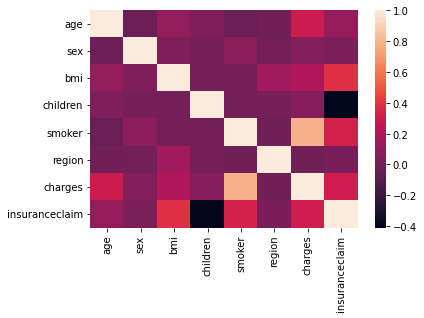

In [ ]:
corr = data.corr()
print(corr)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
data.shape

(1338, 8)

In [ ]:
Train = data[:1000]
Test = data[1000:1300]
Check = data[1300:]

In [ ]:
train_Label = np.asarray(Train['insuranceclaim'])
train_Data = np.asarray(Train.drop('insuranceclaim',1))
test_Label = np.asarray(Test['insuranceclaim'])
test_Data = np.asarray(Test.drop('insuranceclaim',1))

In [ ]:
mean = np.mean(train_Data, axis=0)
std = np.std(train_Data, axis=0)
 
train_Data = (train_Data - mean)/std
test_Data = (test_Data - mean)/std

In [ ]:
lr = LogisticRegression()
lr.fit(train_Data, train_Label)

LogisticRegression()

In [ ]:
accuracy = lr.score(test_Data, test_Label)
print("ACCURACY:",accuracy * 100, "%")

ACCURACY: 86.0 %


Text(0.5, 0, 'Importance')

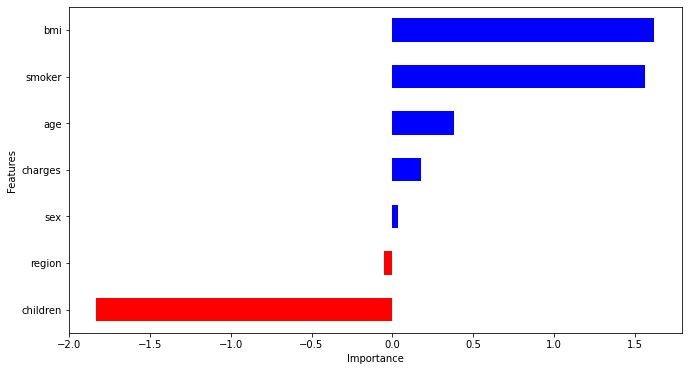

In [ ]:
coeff_ = list(lr.coef_[0])
labels = list(Train.drop('insuranceclaim',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')